# Visualization of K-Means applied on raw pixels

In [30]:
import cv2 as cv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
from src.hierarchical_properties.clustering import k_means_img_patch_rgb_raw
from src.data_generation.utils import downsample_img

In [32]:
# Constants
img_path = r"../../data/img_trial/dog.jpg"

full_size = 448
patch_size = 14

# K-Means
k_s = [2, 4, 6, 8]
max_iter = 100
epsilon = 0.2
attempts = 10
normalize = True
bilinear_interpolation_flag = cv.INTER_LINEAR
nn_interpolation_flag = cv.INTER_NEAREST

weight_original_img = 0.4
weight_colored_patch = 0.4
gamma = 0

In [33]:
img = cv.imread(img_path)
img = downsample_img(img, full_size, full_size, False)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [34]:
final_images_bilinear_interp = []
final_images_nn_interp = []

for k in k_s:
    final_img_bilinear_interp, final_img_nn_interp = \
        k_means_img_patch_rgb_raw(
            img, patch_size, k, max_iter, epsilon,
            attempts, normalize, weight_original_img=0.4,
            weight_colored_patch=0.4, gamma=0,
            compute_also_nn_interpolation=True)
    final_images_bilinear_interp.append(final_img_bilinear_interp)
    final_images_nn_interp.append(final_img_nn_interp)


C:\Users\lucam\miniconda3\envs\Project\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lucam\miniconda3\envs\Project\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lucam\miniconda3\envs\Project\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lucam\miniconda3\envs\Project\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

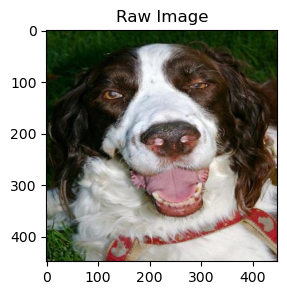

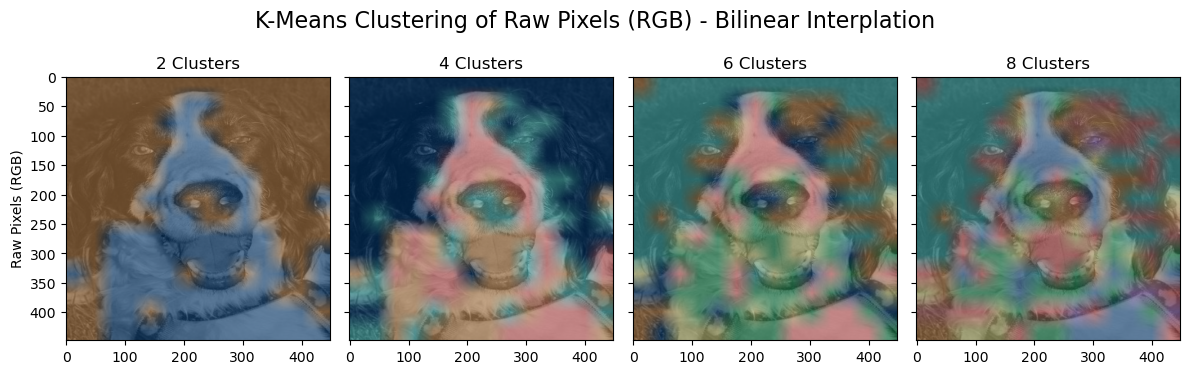

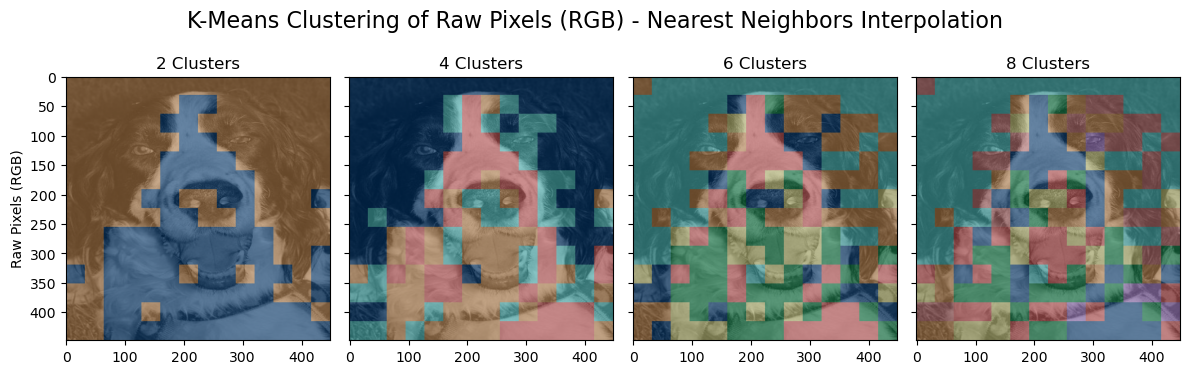

In [35]:
# Plots

# Raw Image
fig = plt.figure(figsize=(3, 3))
plt.title("Raw Image")
plt.imshow(img)
plt.show()

# Raw Pixels (RGB) - Bilinear Interplation
fig, axs = plt.subplots(nrows=1, ncols=len(k_s), figsize=(12, 12),
                        sharex=True, sharey=True)
axs = axs.flatten()
i = 0
for img_kmeans, ax in zip(final_images_bilinear_interp, axs):
    if i % len(k_s) == 0:
        ax.set_ylabel(f"Raw Pixels (RGB)")
    ax.title.set_text(f"{k_s[i]} Clusters")
    ax.imshow(img_kmeans)
    i += 1
fig.suptitle("K-Means Clustering of Raw Pixels (RGB) - Bilinear Interplation", y=0.65, fontsize=16)
fig.tight_layout()
plt.show()

# Raw Pixels (RGB) - Nearest Neighbors Interpolation
fig, axs = plt.subplots(nrows=1, ncols=len(k_s), figsize=(12, 12),
                        sharex=True, sharey=True)
axs = axs.flatten()
i = 0
for img_kmeans, ax in zip(final_images_nn_interp, axs):
    if i % len(k_s) == 0:
        ax.set_ylabel(f"Raw Pixels (RGB)")
    ax.title.set_text(f"{k_s[i]} Clusters")
    ax.imshow(img_kmeans)
    i += 1
fig.suptitle("K-Means Clustering of Raw Pixels (RGB) - Nearest Neighbors Interpolation", y=0.65, fontsize=16)
fig.tight_layout()
plt.show()

# Visualization of K-Means applied on raw pixels (step by step)

In [36]:
import src
from src.data_generation.utils import downsample_img
from src.hierarchical_properties.clustering import k_means_on_feature
import importlib

importlib.reload(src.hierarchical_properties.clustering)
from src.hierarchical_properties.clustering import k_means_on_feature

## Extraction of the patch from the original image

In [37]:
k = 2

In [38]:
patch = downsample_img(img, patch_size, patch_size, False)

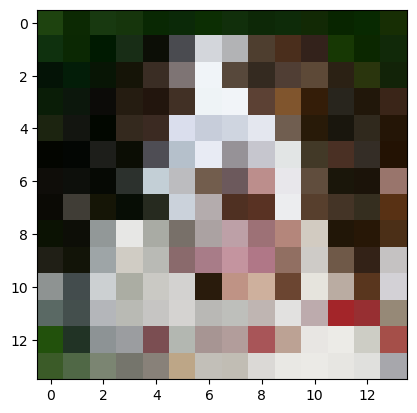

In [39]:
plt.imshow(patch)
plt.show()

### Apply K-Means on the patch

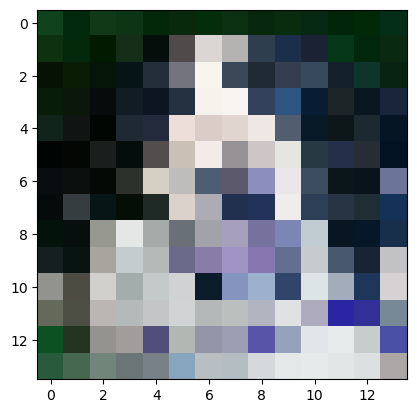

C:\Users\lucam\miniconda3\envs\Project\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


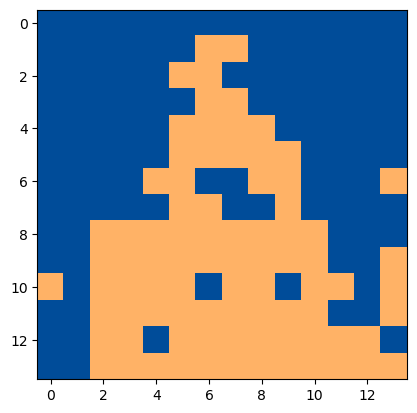

In [40]:
seg_patch, _ = k_means_on_feature(patch, n_clusters=k, max_iter=max_iter, epsilon=epsilon, attempts=attempts, normalize=normalize, plot=True)

## Bilinear Interpolation

In [41]:
seg_full = downsample_img(seg_patch, full_size, full_size, False, interpolation_method=bilinear_interpolation_flag)

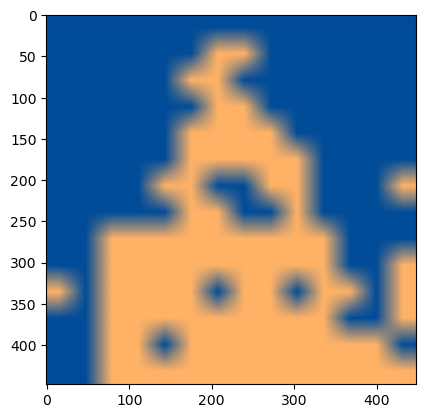

In [42]:
plt.imshow(seg_full)
plt.show()

In [43]:
# Convert the original image as grayscale image to put it in the background
# to be able to put the patch (the output of Kmeans) over it in a transparent
# way.
# Single channel grayscale image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Repeat the grayscale image along all the 3 channels
stacked_img = np.stack((img_gray, ) * 3, axis=-1)

In [44]:
final_img = cv.addWeighted(stacked_img, weight_original_img, seg_full, weight_colored_patch, gamma)

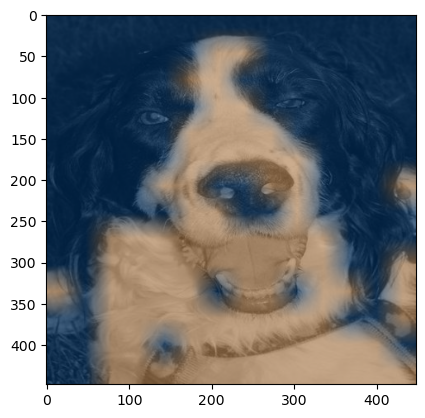

In [45]:
plt.imshow(final_img)
plt.show()

## Nearest Neighbors Interpolation

In [46]:
seg_full_nearest_neighbor_interp = downsample_img(
    seg_patch, full_size, full_size, False,
    interpolation_method=nn_interpolation_flag)

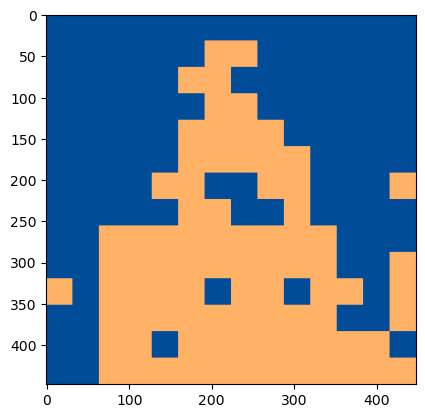

In [47]:
plt.imshow(seg_full_nearest_neighbor_interp)
plt.show()

In [48]:
nearest_neighbor_interp_final_img = cv.addWeighted(
    stacked_img, weight_original_img,
    seg_full_nearest_neighbor_interp,
    weight_colored_patch, gamma)

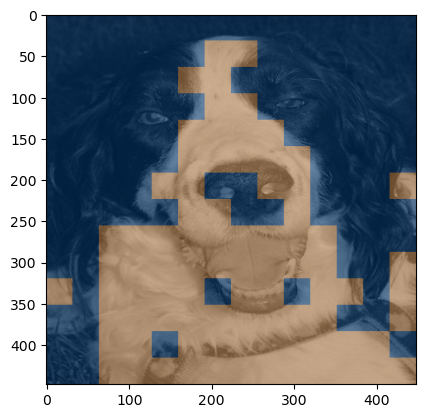

In [49]:
plt.imshow(nearest_neighbor_interp_final_img)
plt.show()